In [2]:
# import tensorflow as tf
# from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from keras.utils import plot_model
from tensorflow.keras.optimizers import Adam


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

#### Getting data from drive and preprocessing using ImageDataGenerator

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Resizing image because we have large image but have limited training resource
# setting parameters
image_height =32
image_width = 32
# Processing 10 image at a time
batch_size = 10

In [6]:
# Getting access  to training,test and validation data
training_data_dir = '/content/drive/My Drive/Datasets/ocr/training_dataset/training_dataset1'
validation_data_dir = '/content/drive/My Drive/Datasets/ocr/validation_dataset/validation_dataset1'
testing_data_dir = '/content/drive/My Drive/Datasets/ocr/testing_dataset/testing_dataset1'

# Generating training, validation and testing data 
# using ImageDataGenerator

datagen = ImageDataGenerator(1./255.0)

# Training data
training_data_generator = datagen.flow_from_directory(training_data_dir,target_size=(image_width,image_height),batch_size = batch_size)
# Validation data
validation_data_generator = datagen.flow_from_directory(validation_data_dir,target_size=(image_width,image_height),batch_size = batch_size)
# Testing data
testing_data_generator = datagen.flow_from_directory(testing_data_dir,target_size=(image_width,image_height),batch_size = batch_size,shuffle= False)
testing_data_generator.reset()

Found 50992 images belonging to 46 classes.
Found 17218 images belonging to 46 classes.
Found 18694 images belonging to 46 classes.


In [7]:

labels = training_data_generator.class_indices
labels
# labels = dict((a,b) for a,b in labels.items())
# labels

{'क': 0,
 'क्ष': 1,
 'ख': 2,
 'ग': 3,
 'घ': 4,
 'ङ': 5,
 'च': 6,
 'छ': 7,
 'ज': 8,
 'ज्ञ': 9,
 'झ': 10,
 'ञ': 11,
 'ट': 12,
 'ठ': 13,
 'ड': 14,
 'ढ': 15,
 'ण': 16,
 'त': 17,
 'त्र': 18,
 'थ': 19,
 'द': 20,
 'ध': 21,
 'न': 22,
 'प': 23,
 'फ': 24,
 'ब': 25,
 'भ': 26,
 'म': 27,
 'य': 28,
 'र': 29,
 'ल': 30,
 'व': 31,
 'श': 32,
 'ष': 33,
 'स': 34,
 'ह': 35,
 '०': 36,
 '१': 37,
 '२': 38,
 '३': 39,
 '४': 40,
 '५': 41,
 '६': 42,
 '७': 43,
 '८': 44,
 '९': 45}

In [8]:
testing_data_generator.class_indices

{'क': 0,
 'क्ष': 1,
 'ख': 2,
 'ग': 3,
 'घ': 4,
 'ङ': 5,
 'च': 6,
 'छ': 7,
 'ज': 8,
 'ज्ञ': 9,
 'झ': 10,
 'ञ': 11,
 'ट': 12,
 'ठ': 13,
 'ड': 14,
 'ढ': 15,
 'ण': 16,
 'त': 17,
 'त्र': 18,
 'थ': 19,
 'द': 20,
 'ध': 21,
 'न': 22,
 'प': 23,
 'फ': 24,
 'ब': 25,
 'भ': 26,
 'म': 27,
 'य': 28,
 'र': 29,
 'ल': 30,
 'व': 31,
 'श': 32,
 'ष': 33,
 'स': 34,
 'ह': 35,
 '०': 36,
 '१': 37,
 '२': 38,
 '३': 39,
 '४': 40,
 '५': 41,
 '६': 42,
 '७': 43,
 '८': 44,
 '९': 45}

In [9]:
validation_data_generator.class_indices

{'क': 0,
 'क्ष': 1,
 'ख': 2,
 'ग': 3,
 'घ': 4,
 'ङ': 5,
 'च': 6,
 'छ': 7,
 'ज': 8,
 'ज्ञ': 9,
 'झ': 10,
 'ञ': 11,
 'ट': 12,
 'ठ': 13,
 'ड': 14,
 'ढ': 15,
 'ण': 16,
 'त': 17,
 'त्र': 18,
 'थ': 19,
 'द': 20,
 'ध': 21,
 'न': 22,
 'प': 23,
 'फ': 24,
 'ब': 25,
 'भ': 26,
 'म': 27,
 'य': 28,
 'र': 29,
 'ल': 30,
 'व': 31,
 'श': 32,
 'ष': 33,
 'स': 34,
 'ह': 35,
 '०': 36,
 '१': 37,
 '२': 38,
 '३': 39,
 '४': 40,
 '५': 41,
 '६': 42,
 '७': 43,
 '८': 44,
 '९': 45}

In [10]:
labels_ = dict((v,k) for k,v in labels.items())
classes = [labels_[v] for v in labels_]
classes

['क',
 'क्ष',
 'ख',
 'ग',
 'घ',
 'ङ',
 'च',
 'छ',
 'ज',
 'ज्ञ',
 'झ',
 'ञ',
 'ट',
 'ठ',
 'ड',
 'ढ',
 'ण',
 'त',
 'त्र',
 'थ',
 'द',
 'ध',
 'न',
 'प',
 'फ',
 'ब',
 'भ',
 'म',
 'य',
 'र',
 'ल',
 'व',
 'श',
 'ष',
 'स',
 'ह',
 '०',
 '१',
 '२',
 '३',
 '४',
 '५',
 '६',
 '७',
 '८',
 '९']

## **Testing model and plotting confusion matrix**

In [11]:
p_model = load_model('/content/drive/My Drive/Saved_models/devanagari_character_recognition_conv_3_by_pandey.h5')
p_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               147584    
_________________________________________________________________
dense_1 (Dense)              (None, 46)                5

In [12]:
help(model)

NameError: ignored

In [ ]:
# Verbose is helpful to see progress bar
test_prediction = p_model.predict_generator(testing_data_generator,steps = (testing_data_generator.samples/testing_data_generator.batch_size),verbose =1)

Instructions for updating:
Please use Model.predict, which supports generators.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


   5/1869 [..............................] - ETA: 34:00

In [ ]:
test_prediction

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
test_prediction.shape

(18294, 46)

In [ ]:
y_pred = np.argmax(test_prediction, axis=1)

In [ ]:
y_pred

array([ 0,  0,  0, ..., 45, 45, 45])

In [ ]:
y_pred.shape

(18294,)

In [ ]:
labels = training_data_generator.class_indices
labels

{'क': 0,
 'क्ष': 1,
 'ख': 2,
 'ग': 3,
 'घ': 4,
 'ङ': 5,
 'च': 6,
 'छ': 7,
 'ज': 8,
 'ज्ञ': 9,
 'झ': 10,
 'ञ': 11,
 'ट': 12,
 'ठ': 13,
 'ड': 14,
 'ढ': 15,
 'ण': 16,
 'त': 17,
 'त्र': 18,
 'थ': 19,
 'द': 20,
 'ध': 21,
 'न': 22,
 'प': 23,
 'फ': 24,
 'ब': 25,
 'भ': 26,
 'म': 27,
 'य': 28,
 'र': 29,
 'ल': 30,
 'व': 31,
 'श': 32,
 'ष': 33,
 'स': 34,
 'ह': 35,
 '०': 36,
 '१': 37,
 '२': 38,
 '३': 39,
 '४': 40,
 '५': 41,
 '६': 42,
 '७': 43,
 '८': 44,
 '९': 45}

In [ ]:
predicted_class_indices = np.argmax(test_prediction,axis=1)
predicted_class_indices

array([36, 36, 36, ..., 35, 35, 35])

In [ ]:
testing_data_generator.classes

array([ 0,  0,  0, ..., 45, 45, 45], dtype=int32)

In [ ]:
cmt = confusion_matrix(testing_data_generator.classes,y_pred) 

In [ ]:
# cmt = confusion_matrix(testing_data_generator.classes,np.round(test_prediction))

In [ ]:
print(cmt)

[[ 5  7 15 ... 11  6  8]
 [ 9 10  6 ...  5  7 11]
 [14  7 11 ... 11 15 17]
 ...
 [13 10 12 ... 10  9 13]
 [11 13  8 ... 11 15 13]
 [ 8  7 10 ...  9 18  9]]


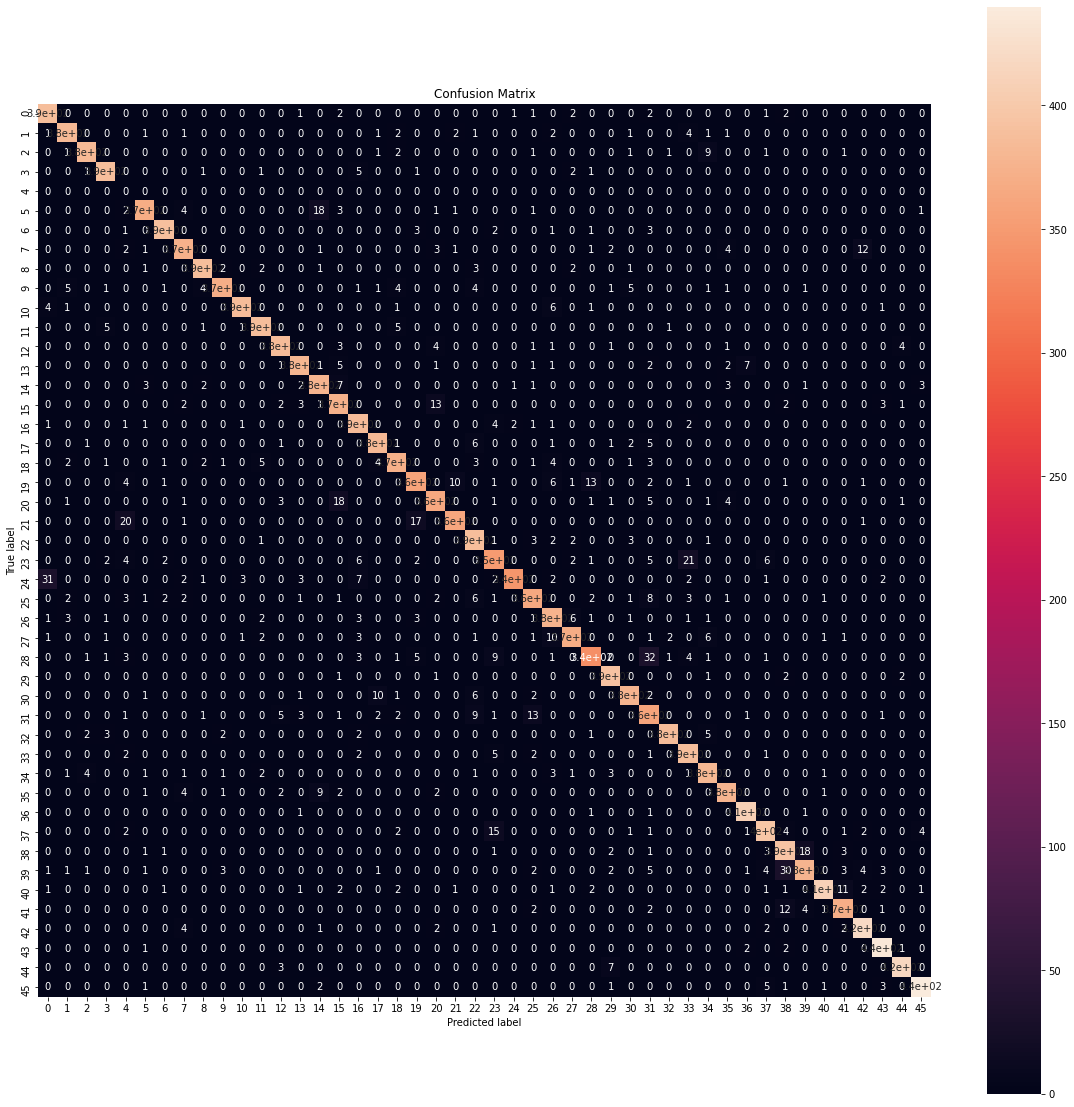

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cmt,annot=True,square= True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
!pip install mlxtend

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:59: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


(<Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff896159ba8>)

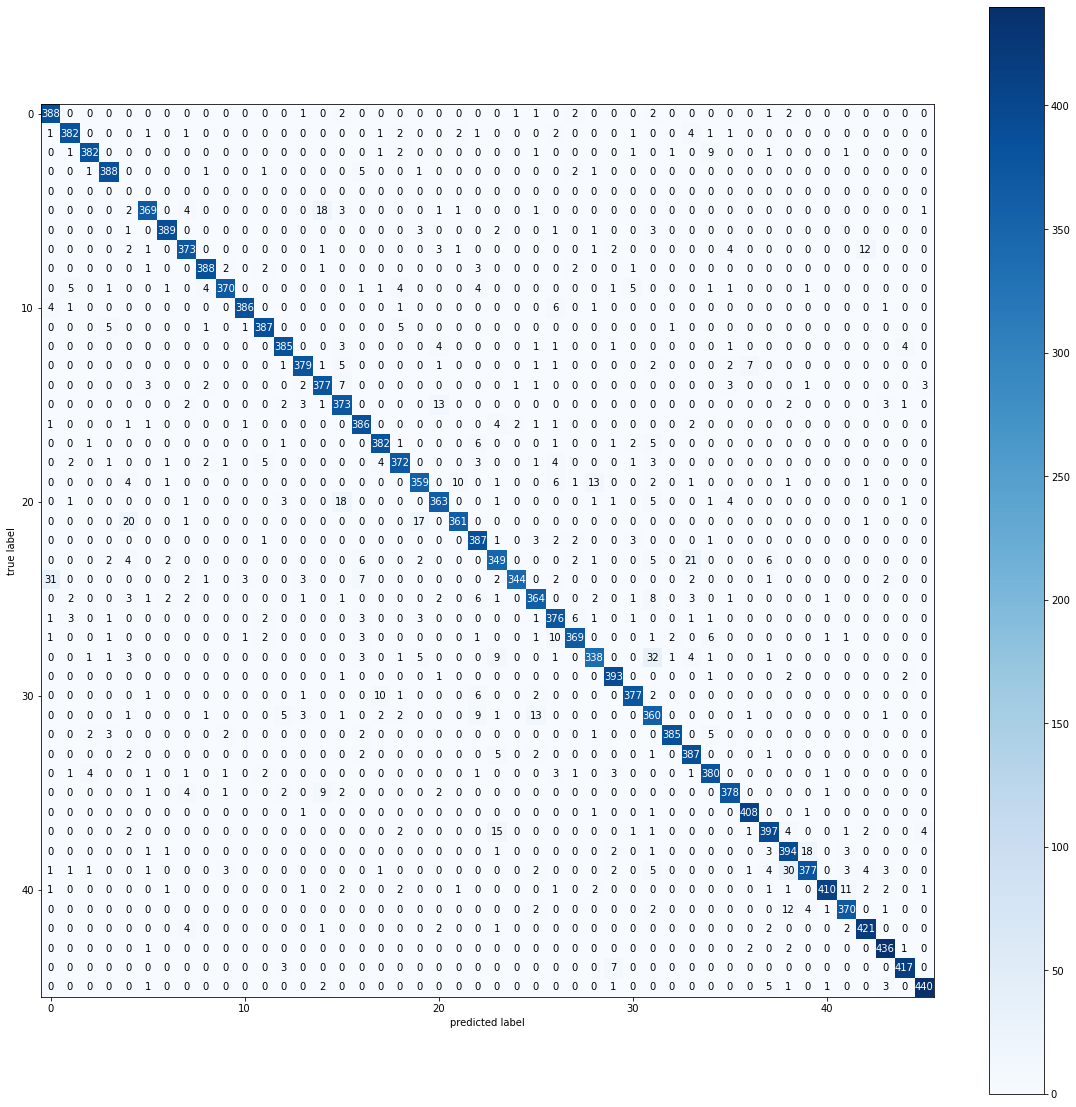

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(conf_mat=cmt,
                                figsize=(20,20),
                                show_normed=False,
                                colorbar=True)


In [ ]:
plot_confusion_matrix(conf_mat=cmt,
                                figsize=(20,20),
                                show_normed=True,
                                class_name = classes,
                                colorbar=True)

TypeError: ignored

In [ ]:
plot_confusion_matrix(conf_mat=cmt,
                                figsize=(20,20),
                                show_normed=True,
                                class_names = classes,
                                )

TypeError: ignored

In [ ]:
np.round([0.9,0.1])

array([1., 0.])

In [ ]:
test_prediction[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
testing_data_generator.classes

array([ 0,  0,  0, ..., 45, 45, 45], dtype=int32)

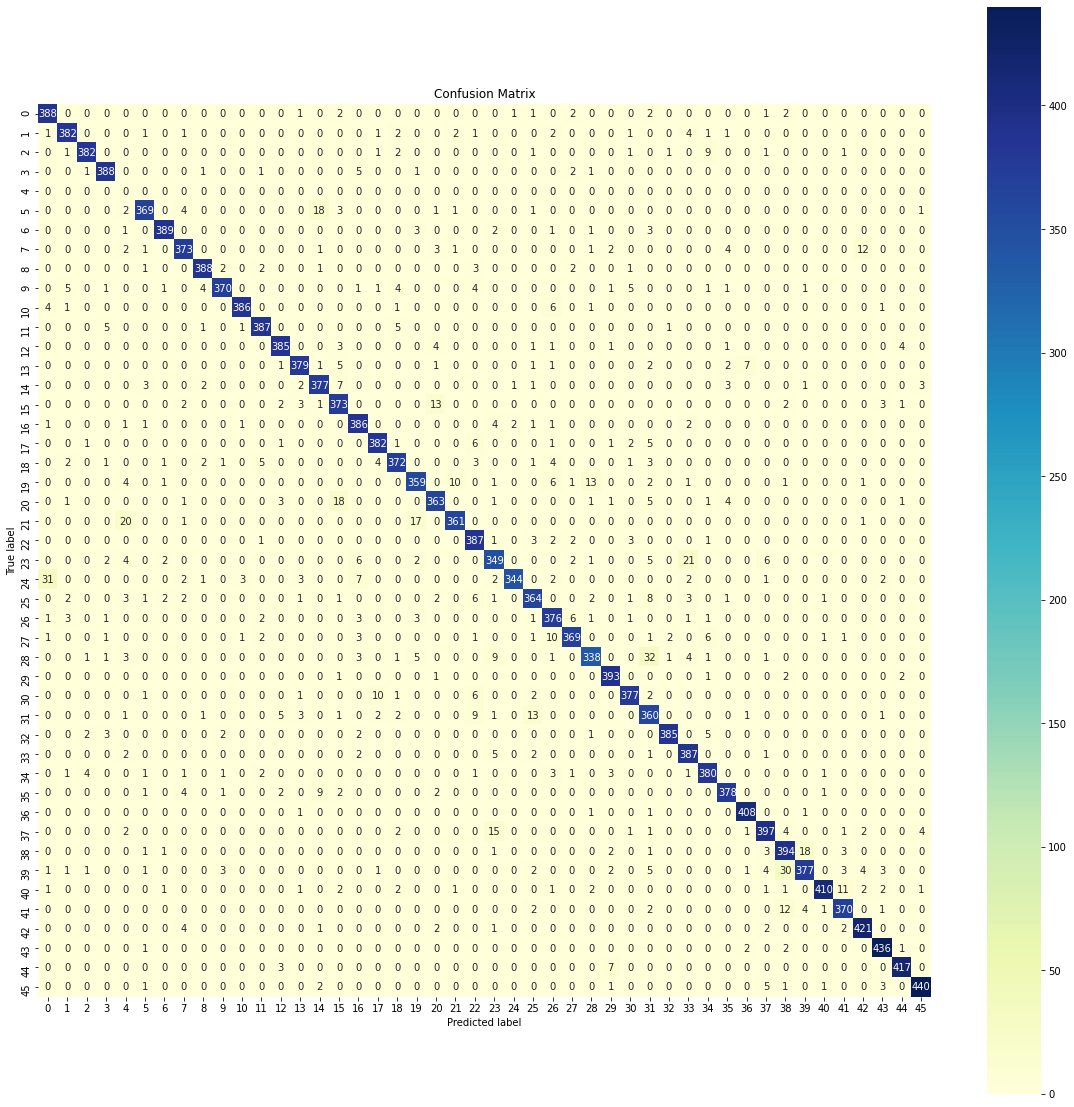

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cmt,annot=True,square= True,fmt ='d',cbar = True,cmap="YlGnBu")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2359 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2326 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2328 missing from current font.
  font.set_text(s

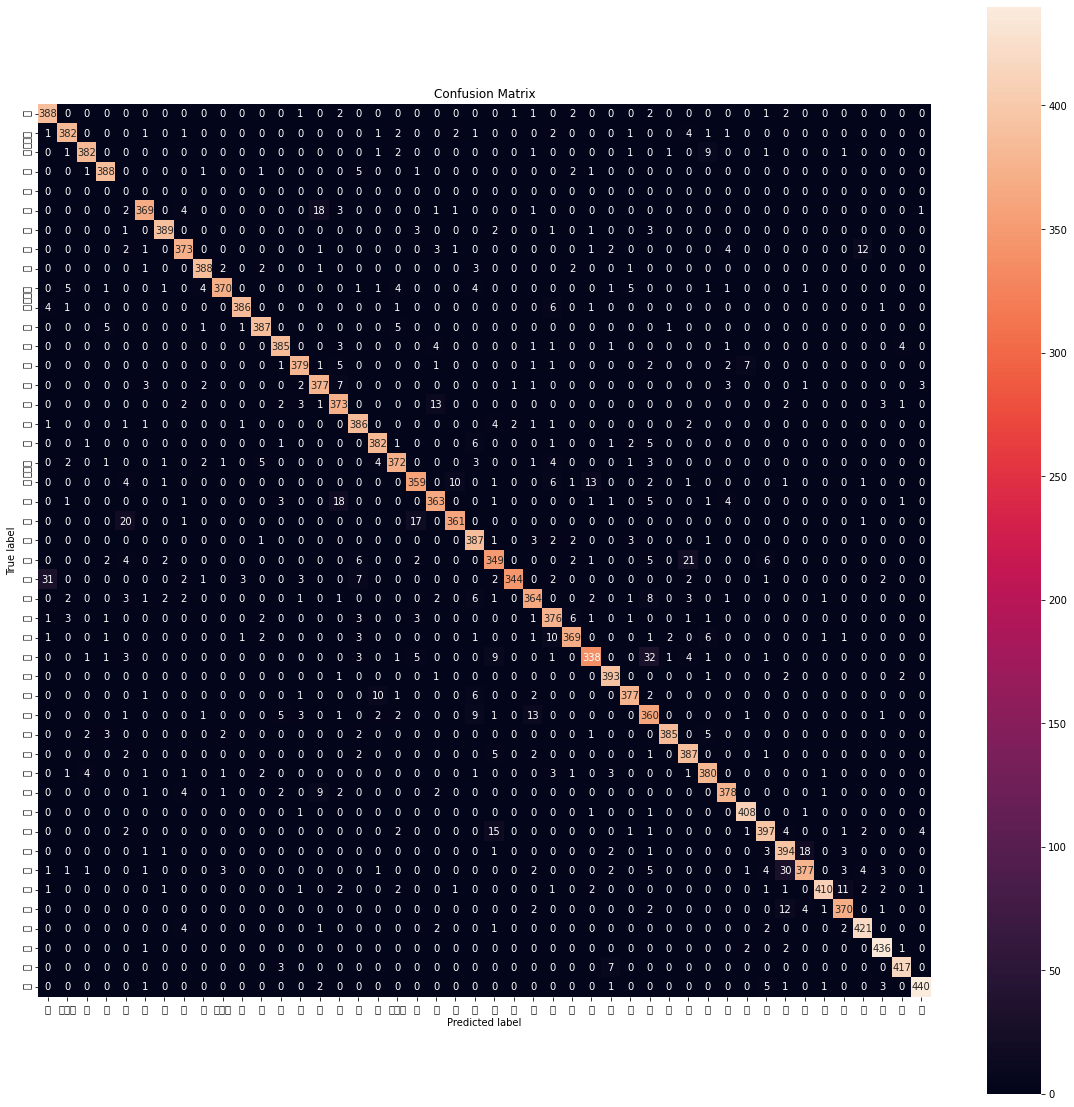

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cmt,annot=True,square= True,fmt ='d',cbar = True )
ax.xaxis.set_ticklabels(class_names )
ax.yaxis.set_ticklabels(class_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


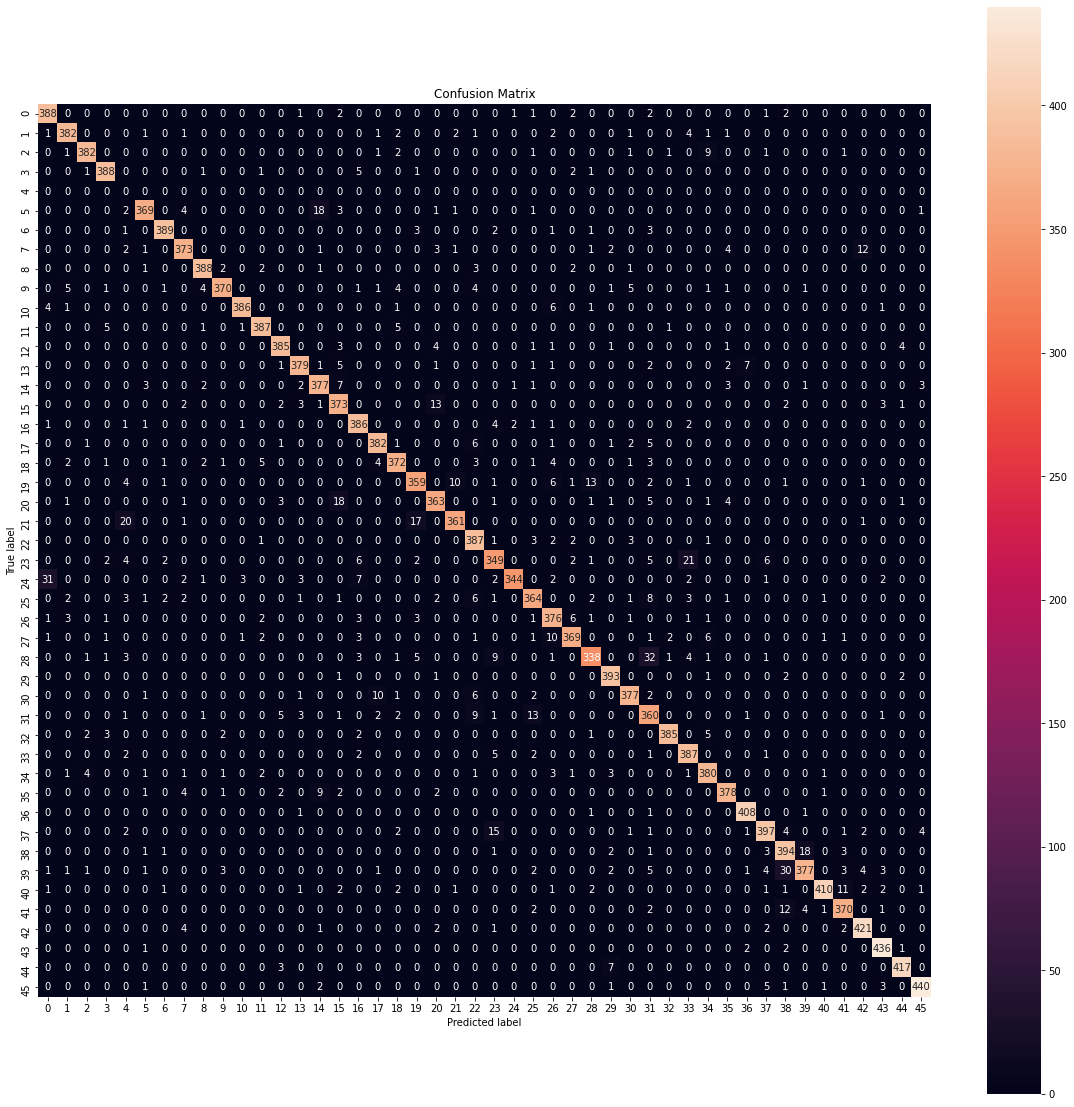

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cmt,annot=True,square= True,fmt ='d',cbar = True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
cm_df = pd.DataFrame(cmt,class_names,class_names)
cm_df.head()

,क,क्ष,ख,ग,घ,ङ,च,छ,ज,ज्ञ,झ,ञ,ट,ठ,ड,ढ,ण,त,त्र,थ,द,ध,न,प,फ,ब,भ,म,य,र,ल,व,श,ष,स,ह,०,१,२,३,४,५,६,७,८,९
क,388,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,1,1,0,2,0,0,0,2,0,0,0,0,0,1,2,0,0,0,0,0,0,0
क्ष,1,382,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,2,0,0,2,1,0,0,0,2,0,0,0,1,0,0,4,1,1,0,0,0,0,0,0,0,0,0,0
ख,0,1,382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,9,0,0,1,0,0,0,1,0,0,0,0
ग,0,0,1,388,0,0,0,0,1,0,0,1,0,0,0,0,5,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
घ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2326 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2330 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2332 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2333 missing from current font.
  font.set_text(s

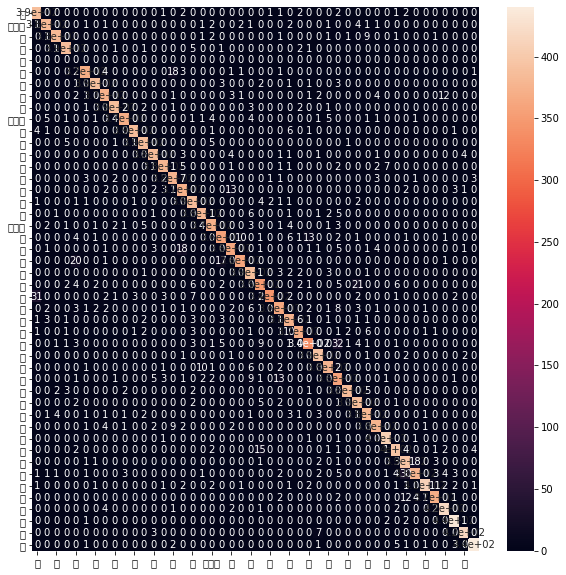

In [ ]:
    fig, ax = plt.subplots(figsize=(20,20))
    plt.figure(figsize=(10,10))  
    sns.heatmap(cm_df, annot=True)
    plt.show()